In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import json
import cv2
from PIL import Image, ImageOps
from collections import Counter

In [8]:
%cd home

/home


In [26]:
img_list = glob.glob('./datasets/images/processed_test/*.jpg')

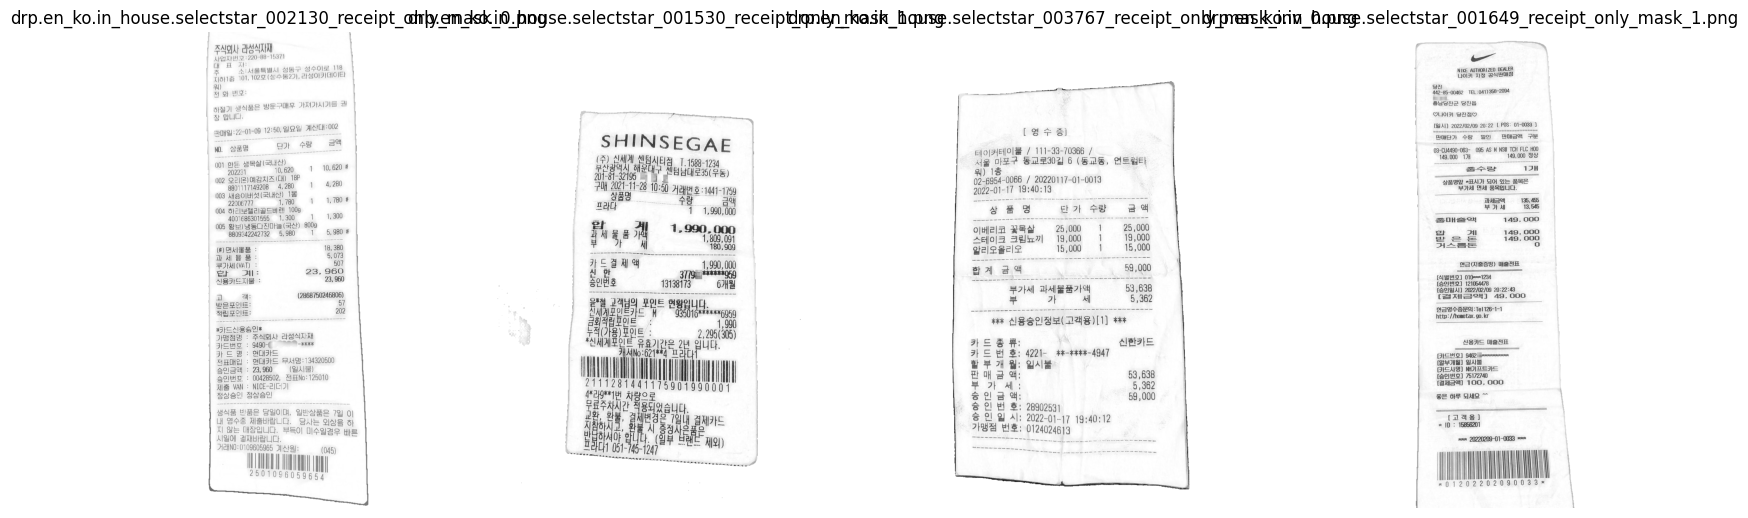

In [14]:
random.shuffle(img_list)

num_images = min(len(img_list), 20)

plt.figure(figsize=(20, 20))

for i in range(num_images):
    ax = plt.subplot(4, 5, i+1)
    img_name = img_list[i].split('/')[-1]
    img = Image.open(img_list[i]).convert('L') 
    img = ImageOps.exif_transpose(img) 
    plt.title(img_name)
    plt.imshow(img, cmap='gray') 
    plt.axis('off')  

plt.tight_layout()
plt.show()

In [15]:
with open('./baseline_code/outputs/ocr_training/submissions/20241023_194948.json', 'r') as f:
    data = json.load(f)
    words = data['images'][img_list[0].split('/')[-1]]['words']
    for word_id, word_data in words.items():
        points = word_data.get('points', [])
        print(points)

[[467, 1186], [482, 1186], [482, 1209], [467, 1209]]
[[448, 1186], [465, 1182], [471, 1206], [454, 1210]]
[[435, 1182], [451, 1182], [451, 1207], [435, 1207]]
[[419, 1181], [434, 1181], [434, 1206], [419, 1206]]
[[403, 1179], [418, 1179], [418, 1205], [403, 1205]]
[[387, 1178], [402, 1178], [402, 1204], [387, 1204]]
[[371, 1178], [386, 1178], [386, 1202], [371, 1202]]
[[355, 1177], [371, 1177], [371, 1202], [355, 1202]]
[[340, 1174], [358, 1179], [352, 1202], [334, 1197]]
[[325, 1175], [340, 1175], [340, 1199], [325, 1199]]
[[308, 1175], [323, 1175], [323, 1198], [308, 1198]]
[[294, 1176], [308, 1176], [308, 1197], [294, 1197]]
[[278, 1174], [293, 1174], [293, 1197], [278, 1197]]
[[469, 1110], [516, 1112], [515, 1139], [468, 1137]]
[[349, 1106], [415, 1108], [414, 1133], [348, 1131]]
[[191, 1105], [344, 1108], [344, 1128], [191, 1125]]
[[254, 1084], [368, 1084], [368, 1105], [254, 1105]]
[[190, 1080], [246, 1082], [245, 1105], [189, 1103]]
[[530, 1062], [575, 1065], [573, 1091], [529, 

In [16]:
def print_bbox(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_name = img_path.split('/')[-1]

    with open('./baseline_code/outputs/ocr_training/submissions/20241023_194948.json', 'r') as f:
        data = json.load(f)
        words = data['images'][img_name]['words']
        for word_id, word_data in words.items():
            points = np.array(word_data.get('points', []))
            points = np.round(points).astype(np.int32).reshape((-1, 2))
            cv2.polylines(img, [points], True, color=(0, 255, 0), thickness=2)

    plt.figure(figsize=(10, 10))
    plt.title(img_name)
    plt.imshow(img)
    plt.show()
    

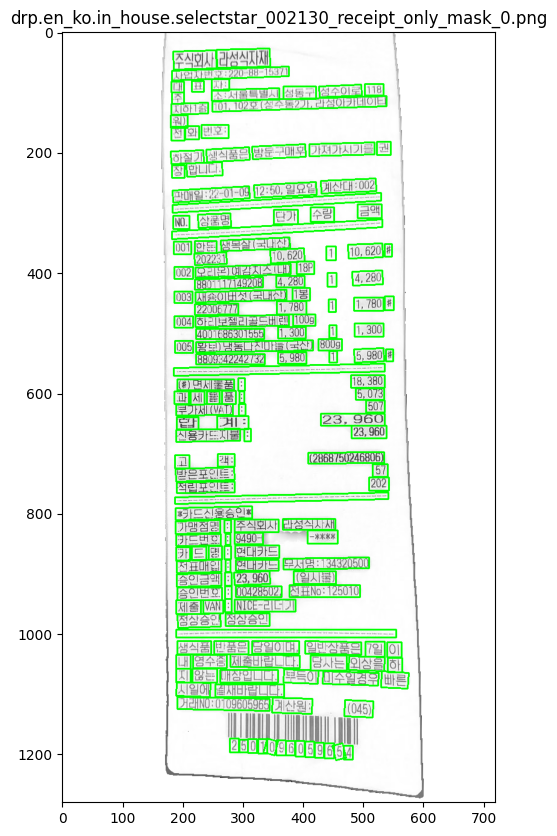

In [17]:
print_bbox(img_list[0])

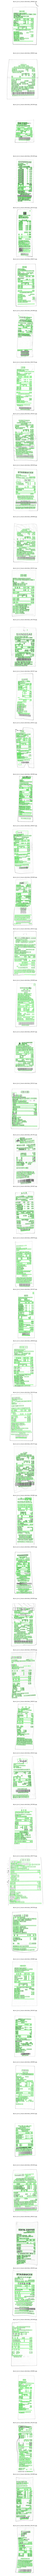

In [32]:
random.shuffle(img_list)

num_images = min(len(img_list), 50)

def print_bbox(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_name = img_path.split('/')[-1]

    with open('./baseline_code/outputs/ocr_training/submissions/20241020_215113.json', 'r') as f:
        data = json.load(f)
        words = data['images'][img_name]['words']
        for word_id, word_data in words.items():
            points = np.array(word_data.get('points', []))
            points = np.round(points).astype(np.int32).reshape((-1, 2))
            cv2.polylines(img, [points], True, color=(0, 255, 0), thickness=2)

    plt.imshow(img)
    plt.axis('off')  


plt.figure(figsize=(10, num_images * 5))  

for i in range(num_images):
    ax = plt.subplot(num_images, 1, i+1) 
    print_bbox(img_list[i])
    plt.title(img_list[i].split('/')[-1], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()